In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing


In [148]:
df=pd.read_csv("cleaned_cafe.csv")
df.info()
df.corr(numeric_only=True)
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
 8   Day               10000 non-null  int64  
 9   Year              10000 non-null  int64  
 10  Month             10000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB
['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date', 'Day', 'Year', 'Month']


In [149]:
x = df[['Price Per Unit', 'Quantity', 'Day', 'Month']]
y = df['Total Spent']

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Polynomial transformation
pf = PolynomialFeatures(degree=4)
x_poly_train = pf.fit_transform(xtrain)
x_poly_test = pf.transform(xtest)

# Train the model
polynomial_model = LinearRegression()
polynomial_model.fit(x_poly_train, ytrain)

# Predict and evaluate
predicted = polynomial_model.predict(x_poly_test)
mse_error = mean_squared_error(ytest, predicted)
r2 = r2_score(ytest, predicted)

print("Mean Squared Error:", mse_error)
print("R² Score:", r2)

Mean Squared Error: 8.271812618814824
R² Score: 0.7846382622222163


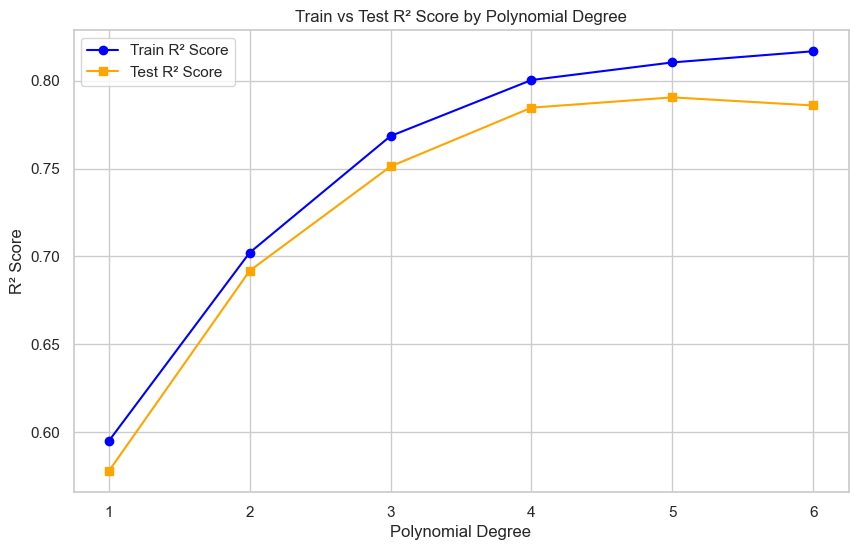

In [150]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Features and target
x = df[['Price Per Unit', 'Quantity', 'Day', 'Month']]
y = df['Total Spent']

# Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Store R² scores
train_scores = []
test_scores = []
degrees = range(1, 7)

for d in degrees:
    pf = PolynomialFeatures(degree=d)
    x_poly_train = pf.fit_transform(xtrain)
    x_poly_test = pf.transform(xtest)

    model = LinearRegression()
    model.fit(x_poly_train, ytrain)

    train_pred = model.predict(x_poly_train)
    test_pred = model.predict(x_poly_test)

    train_r2 = r2_score(ytrain, train_pred)
    test_r2 = r2_score(ytest, test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, marker='o', label='Train R² Score', color='blue')
plt.plot(degrees, test_scores, marker='s', label='Test R² Score', color='orange')
plt.title('Train vs Test R² Score by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()
